<a href="https://colab.research.google.com/github/MaulanaJauhar/PCVK/blob/main/Week12/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modul 12 - Face Detection
##Kelompok 8



*   Aido Luthfi Al Hakim **(6 | 2141720136)**
*   Jauhar Maulana A'la  **(14 | 2141720186)**
*   Naufal Falah Wafiuddin **(23 | 2141720129)**


##Tugas Praktikum

###1. Import Library dan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

###2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

In [11]:
def image_detection(image_path, face_cascade):

  # Convert to grayscale
  img_gray = cv.cvtColor(cv.imread(image_path),0, cv.COLOR_BGR2GRAY)

  # Detect faces
  faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=4)

  # Draw rectangles around the faces
  for (x, y, w, h) in faces:
    cv.rectangle(img_gray, (x, y), (x+w, y+h), (0, 255,0), 2)

  # Display the images
  plt.subplot(121), plt.imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB),cmap="gray")
  plt.title('Gambar Asli'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB),cmap="gray")
  plt.title('Hasil'), plt.xticks([]), plt.yticks([])

  plt.show()

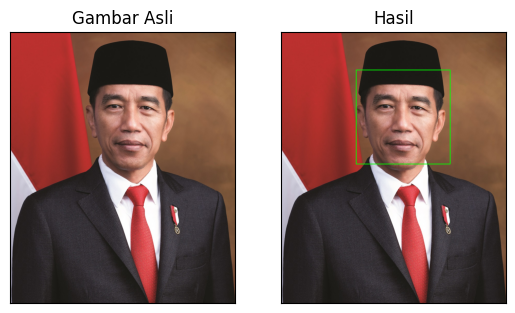

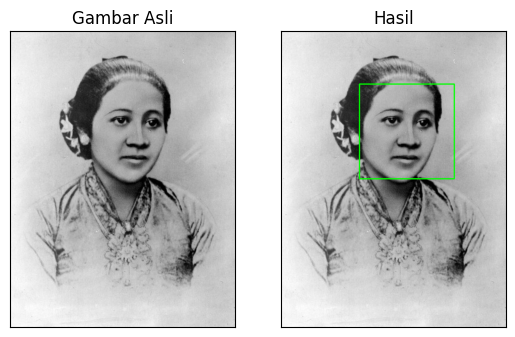

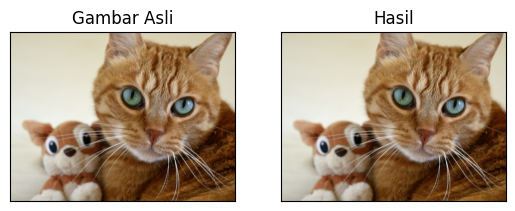

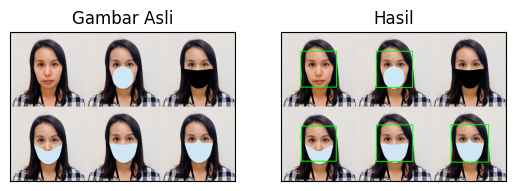

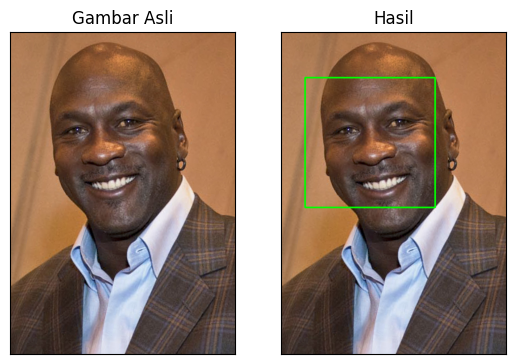

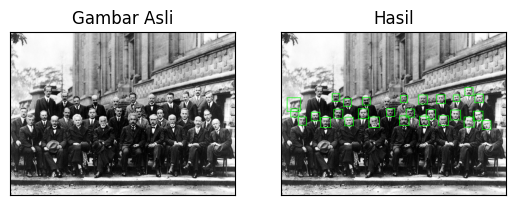

In [12]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')
image_path = [
    '/content/drive/MyDrive/PCVK/Face Detection/jokowi.jpg',
    '/content/drive/MyDrive/PCVK/Face Detection/kartini.jpg',
    '/content/drive/MyDrive/PCVK/Face Detection/kucing2.jpg',
    '/content/drive/MyDrive/PCVK/Face Detection/mask.png',
    '/content/drive/MyDrive/PCVK/Face Detection/mjordan.jpg',
    '/content/drive/MyDrive/PCVK/Face Detection/solvayconf.jpg'
]
for image in image_path:
  image_detection(image, face_cascade)


###3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan.

<Figure size 1000x1000 with 0 Axes>

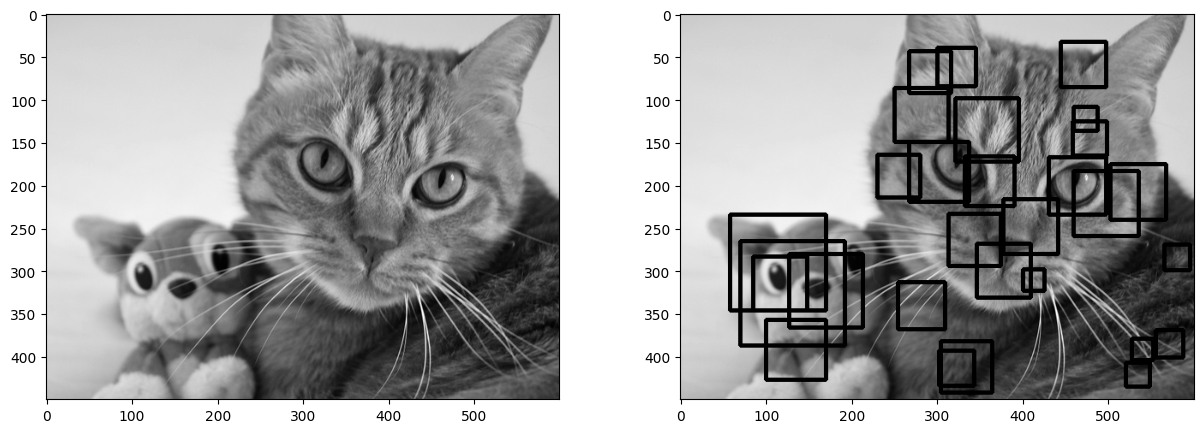

In [37]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalcatface.xml')

empus = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/kucing2.jpg',0)
empus1 = cv.imread('/content/drive/MyDrive/PCVK/Face Detection/kucing2.jpg',0)

roi_wajah = cascade_wajah.detectMultiScale(empus1)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(empus1,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(empus, cmap='gray')
plt.subplot(122),plt.imshow(empus1, cmap='gray')
plt.show()

###4. Cobakan juga untuk eyes detection.

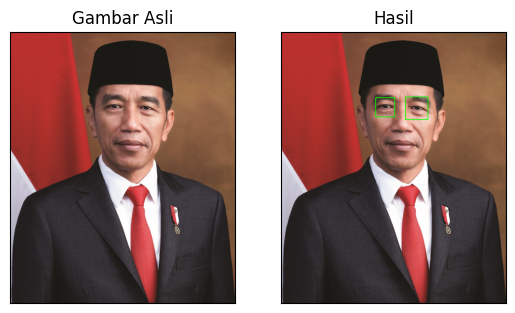

In [16]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_eye.xml')
jokowi = '/content/drive/MyDrive/PCVK/Face Detection/jokowi.jpg'

image_detection(jokowi, face_cascade)

###5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [18]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2 as cv
import numpy as np
import PIL
import io
import html
import time

In [19]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [20]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Face Detection/haarcascade_frontalface_alt.xml')

###Webcam Image

In [21]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


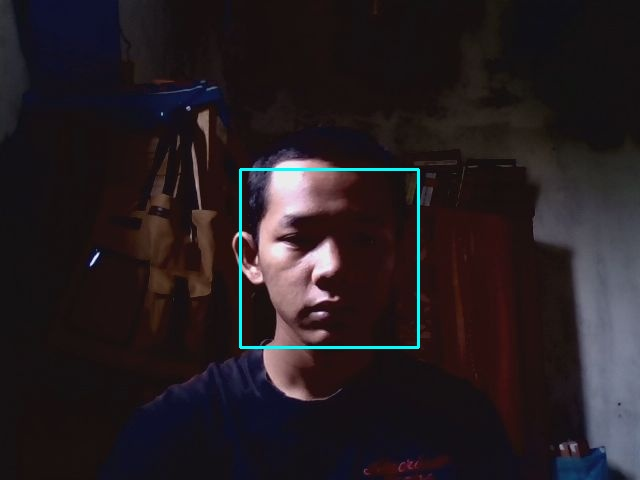

In [22]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

###Webcam Video

In [23]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [24]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,255),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

###6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

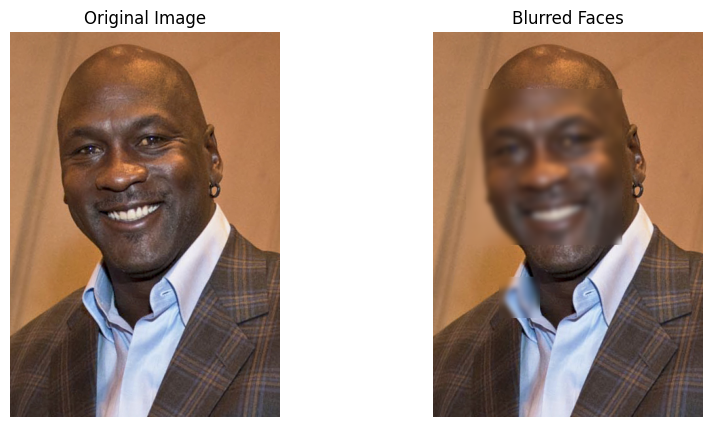

In [25]:
# Fungsi untuk mendeteksi wajah dan mengaplikasikan blur
def detect_and_blur_faces(image_path):
    # Baca gambar
    image = cv.imread(image_path)
    # Konversi gambar menjadi skala abu-abu
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Menggunakan CascadeClassifier untuk deteksi wajah
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Iterasi melalui wajah yang terdeteksi dan aplikasikan blur
    for (x, y, w, h) in faces:
        face_roi = image[y:y+h, x:x+w]
        # Aplikasikan blur menggunakan GaussianBlur
        blurred_face = cv.GaussianBlur(face_roi, (99, 99), 4)
        # Tempatkan wajah yang di-blur ke dalam gambar asli
        image[y:y+h, x:x+w] = blurred_face

    return image

# Path gambar input
input_image_path = '/content/drive/MyDrive/PCVK/Face Detection/mjordan.jpg'

# Deteksi wajah, aplikasikan blur, dan tampilkan hasilnya
result_image = detect_and_blur_faces(input_image_path)

# Tampilkan gambar asli dan gambar hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(cv.imread(input_image_path), cv.COLOR_BGR2RGB))
plt.axis('off')

# Gambar hasil dengan wajah yang di-blur
plt.subplot(1, 2, 2)
plt.title('Blurred Faces')
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

###7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

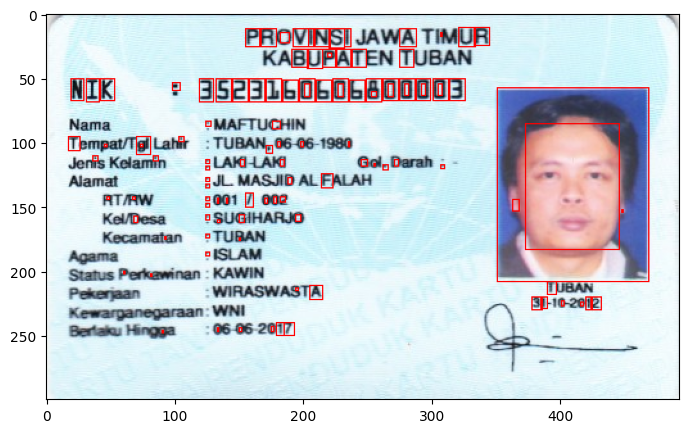

In [27]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

###8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

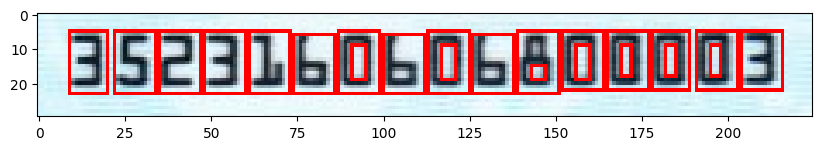

In [31]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[45:75, 110:335]

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

###9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [36]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training di Google Drive
DATADIR = "/content/drive/MyDrive/PCVK/Dataset"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)

X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


###10. Lakukan Training Data

In [46]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# ...

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y, num_classes=34)  # Corrected this line

X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flatten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 3.5608 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 294ms/step - loss: 2.8070 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 419ms/step - loss: 1.2142 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 384ms/step - loss: 0.1515 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 336ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 314ms/step - loss: 1.2135e-04 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 257ms/step - loss: 5.3644e-07 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 320ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 267ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 273ms/step - loss: 0.0000e+00 - accuracy: 1.000

###11. Lakukan Testing Data

In [52]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/PCVK/Dataset/training"
data_dir_testing = "/content/drive/MyDrive/PCVK/Dataset/testing"
dirs = []
width, height = 100, 100
model = tf.keras.models.load_model("anpr.model")

for char_name in sorted(os.listdir(data_dir_training)):
    dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
        img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_ANYCOLOR)
        new_array = cv2.resize(img_array, (width, height))
        new_array = np.array(new_array).reshape(-1, width, height, 1)
        new_array = new_array / 255.0
        prediction = model.predict(new_array)
        temp += dirs[np.argmax(prediction[0])]

    print("folder name: {} no: {}".format(car, temp))


###Tugas

Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

In [57]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [46.8 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,194 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-

In [58]:
!pip install pytesseract

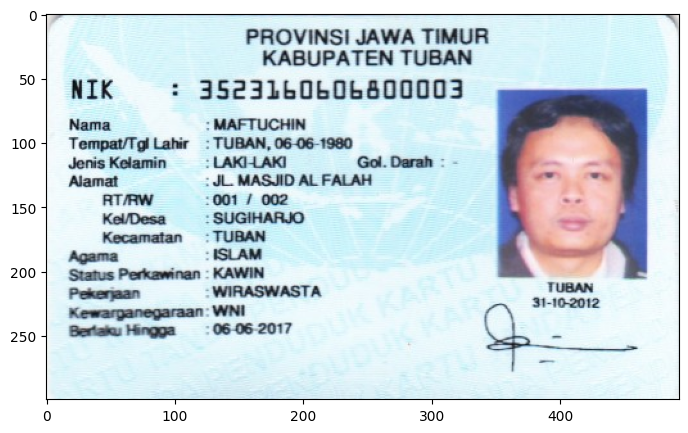

In [59]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt

# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
        roi = ktp[y:y+h, x:x+w]
        # Perform OCR on the region of interest (roi)
        text = pytesseract.image_to_string(roi, config='--psm 8')
        # Check if the extracted text is likely to be an NIK (you may need to adjust this condition)
        if text.isnumeric() and len(text) == 16:
            print("NIK:", text)
            cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
            cv.putText(ktp, f"NIK: {text}", (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.show()
